In [ ]:
# hrwros_msgs/action/CounterWithDelay.action

uint32 num_counts     # Goal field
---                   # Separator
string result_message # Result field
---                   # Separator
uint32 counts_elapsed # Feedback field

In [ ]:
$ rosmsg show hrwros_msgs/CounterWithDelayAction

In [ ]:
$ rosrun actionlib_msgs genaction.py -o msg action/CounterWithDelay.action

In [ ]:
$ rosmsg show hrwros_msgs/

In [ ]:
hrwros_msgs> $ rosmsg show hrwros_msgs/CounterWithDelayAction

 **Actions in action!**


In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash

In [ ]:
$ rosrun hrwros_week1 counter_with_delay_as.py

In [ ]:
$ rosrun hrwros_week1 counter_with_delay_ac.py

In [ ]:
$ rostopic echo /counter_with_delay/feedback

# **4. ROS Actions client server communication**

* **ROS	Actions**-	No	waiting	until	an	execution	is	complete	(nonblocking!)	
 * waiting	is	an	option	if	required.	 

* We will show you how the terminology works and give an example of implementation of a counter. 

* **Ex: A	case	for	non-blocking	execution**

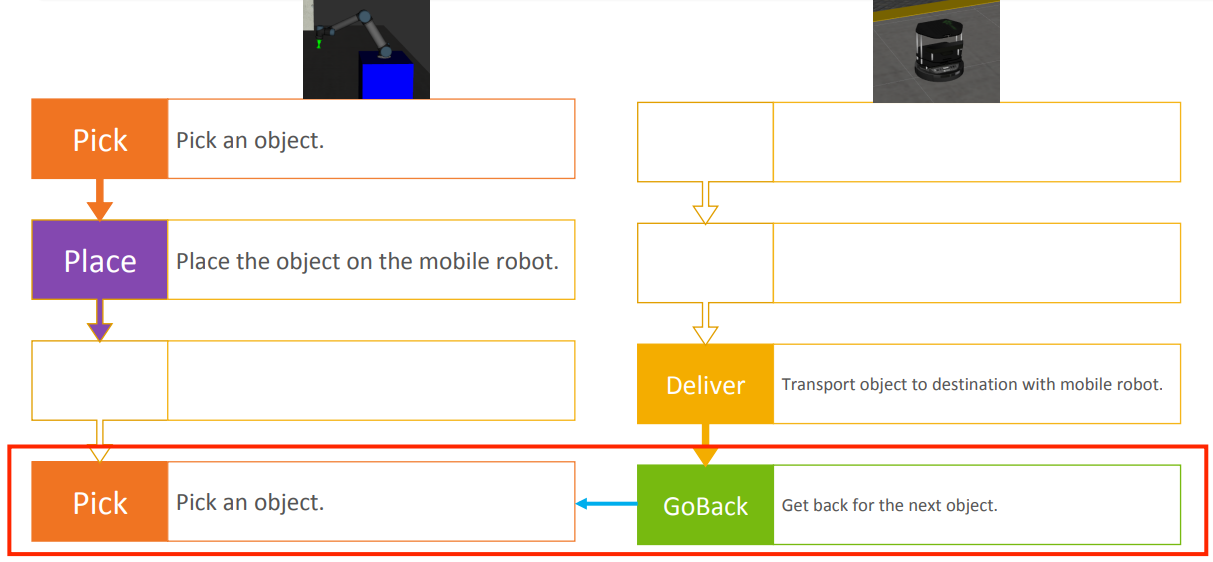

## **1. ROS	Actions	–	the	basic	idea**



*  This way, multiple things can happen at the same time.

*  They are a generalized **request-response system** (as for services): a **client-server** infrastructure. 



* Actions are defined by three message types:

1. A **`goal`** (request),
2. The **`result`** (response),
3. And **`feedback`**.

## **2. ROS	Actions	–	an	example	action	definition**

Requirement: Counter with a 1s delay between each increment.

* **`Goal`** message    : Number to count up to **`(uint32)`**
* **`Result`** message  : A status message **`(string)`**
* **`Feedback`** message: The number of counts completed **`(uint32)`**

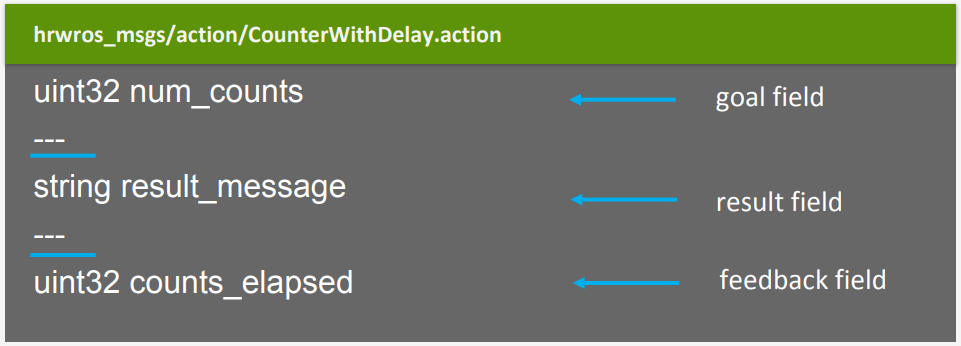

## **3. ROS	Actions	–	on	the	filesystem,	utility	cmds**

* ROS	action	definitions	reside	in	the	ROS	package	

 * **`hrwros_msgs/action`**	folder.	

* **generate	action	messages**	manually

In [ ]:
$ rosrun actionlib_msgs genaction.py <path_to_action_file> 

* **show	the	contents**	of	an	action	message	

In [ ]:
$ rosmsg show <stack_name>_msgs/<ActionMessage> 

## **4. ROS	actions	–	a	few	properties**

**1. ROS	Actions	–	processing	a	goal	request**

 * The **`goalCallback function`** processes a goal request.

 * **Goal statuses**: `ACTIVE, SUCCEEDED, ABORTED`.

**2. ROS	Action	–	code	nomenclature**

* A ROS node **`Action server`**
  *  **`advertises an action`**, so that other nodes can request action goals to be processed.






* A ROS node **`Action client`**
  * **`sends goal`** requests to the action server.


 **`Question`** In the previous lecture, we had a question about a waiter, an order, and a kitchen. 
 * We assumed the waiter would keep waiting at the kitchen until the order was ready. 
 * Of course, this is very impractical in most restaurants.
 *  We would want the waiter to continue to take orders, and only return when the dish is ready, or when there are more orders.?






* In ROS terminology, would it be accurate to say the waiter is performing a service, or an action?


```
A. The waiter is performing a service.

B. The waiter is perfoming an action.

```

**`Answer`**

```
B:This is correct, because the kitchen does not block the waiter from leaving.

```

# **4.1 ROS Actions action message and goal processing**


* Its about creating a ROS service client and server.

* We will start with creating our own service type, and take a look at an example service server created in Python.

## **1. Actions	–	generated	ROS	messages**

* Messages	generated	for	CounterWithDelay	action	type.	


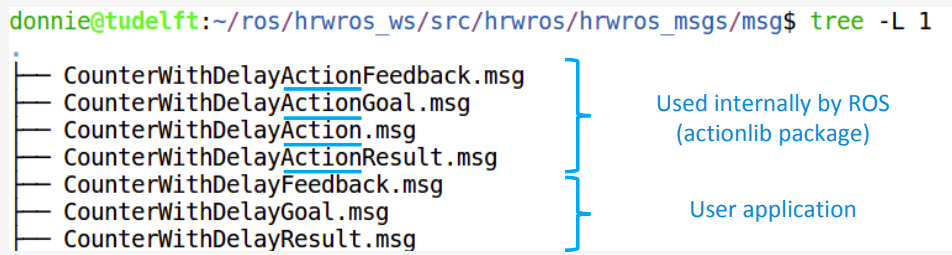

## **2. Actions	–	generated	ROS	messages**

* Messages	for	use	on	the	application	side

In [ ]:
new_ros_ws> rosmsg show hrwros_msgs/CounterWithDelay



```
hrwros_msgs/CounterWithDelayAction
hrwros_msgs/CounterWithDelayActionFeedback
hrwros_msgs/CounterWithDelayActionGoal
hrwros_msgs/CounterWithDelayActionResult
hrwros_msgs/CounterWithDelayFeedback
hrwros_msgs/CounterWithDelayGoal
hrwros_msgs/CounterWithDelayResult
hrwros_msgs/SensorInformation
```



* Messages	generated	for	CounterWithDelay	action	type.	

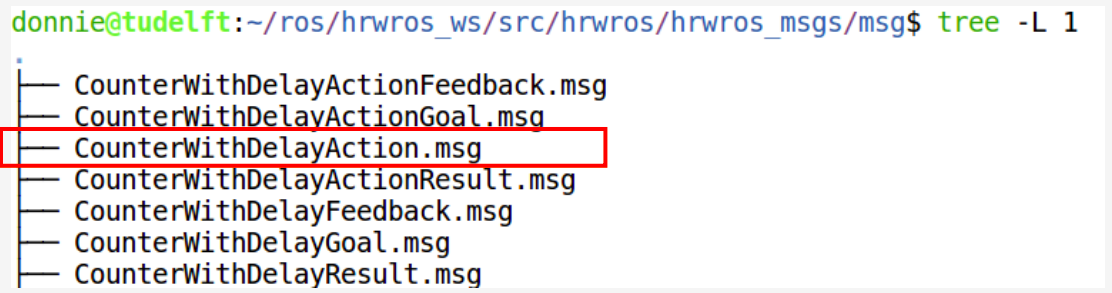

The action generator script displays 7 actions:

* Specified actions:
 1. CounterWithDelayFeedback
 2. CounterWithDelayGoal
 3. CounterWithDelayResult

* Additional actions which are used internally by the actionlib package:
 4. CounterWithDelayActionFeedback
 5. CounterWithDelayActionGoal 
 6. CounterWithDelayAction
 7. CounterWithDelayActionResult

## **3. Actions	client**

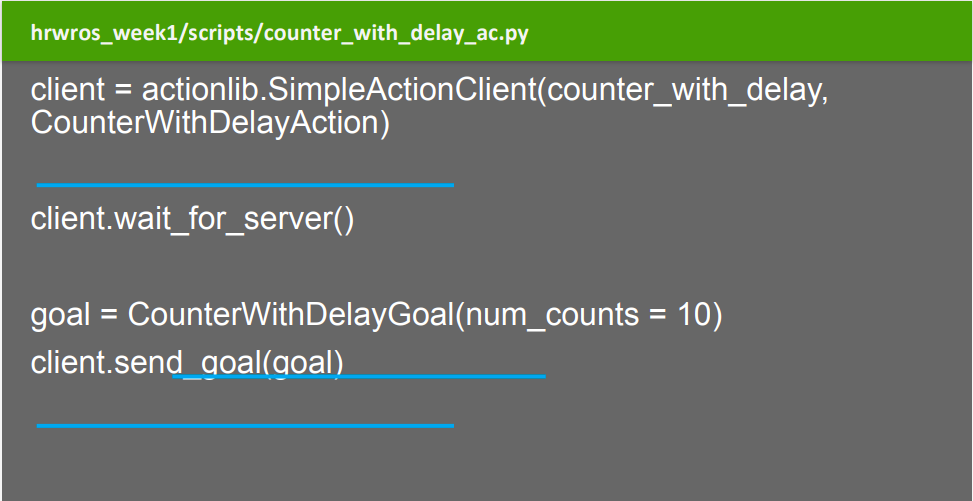

* We learned in the previous video that the **action client** **"sends"** a goal to an action server
 * where the goal will be processed.

* The first thing we can notice here is that the action client is of the type **`CounterWithDelayAction`**

* In other words, this is the action type of our **`action client`**.

* We also notice that we use the message type **`CounterWithDelayGoal`**, that DOESNOT have the word **`action`** in it.


* That is because, the **`action client`** code is something that we as users **develop to be able to leverage the facilities** of the actionlib ROS package.

* And, when we send the goal from our client, this **goal** is **"registered"** by the **`actionserver`** and the **`actionlib`** ROS package.

## **4.	Actions	message**

In [ ]:
Singularity HRWROS:~/new_ros_ws/src/hrwros/hrwros_msgs> rosmsg show hrwros_msgs/CounterWithDelayAction

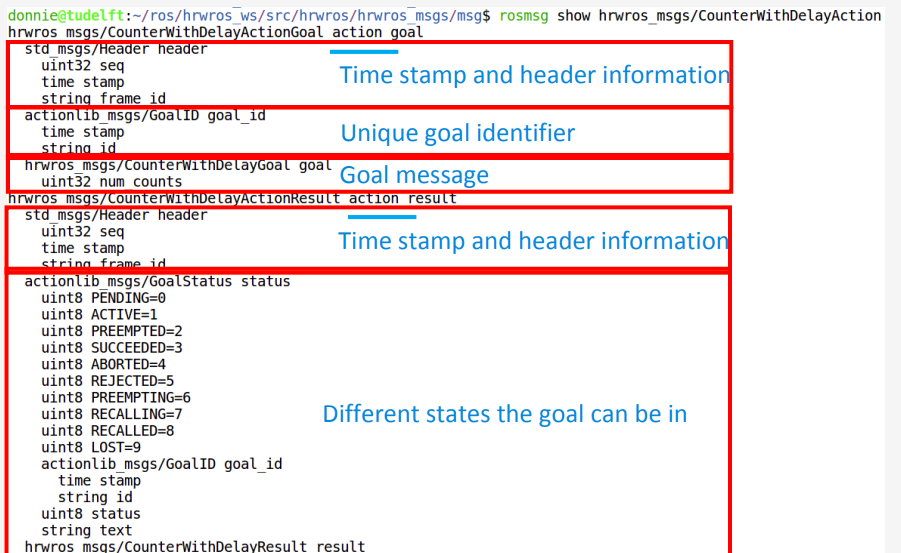

* **`Goal`** contains:

 1. Timestamp and header info
 2. Unique goal identifier
 3. Goal message

* **`Action Result`** contains:

 1. Timestamp and header info
 2. Different states the goal can be in

* **`Feedback`** contains:

 1. Timestamp and header info
 2. Different states the goal can be in
 3. Feedback message

In [ ]:
Singularity HRWROS:~/new_ros_ws/src/hrwros/hrwros_msgs> rosmsg show hrwros_msgs/CounterWithDelayActionFeedback 

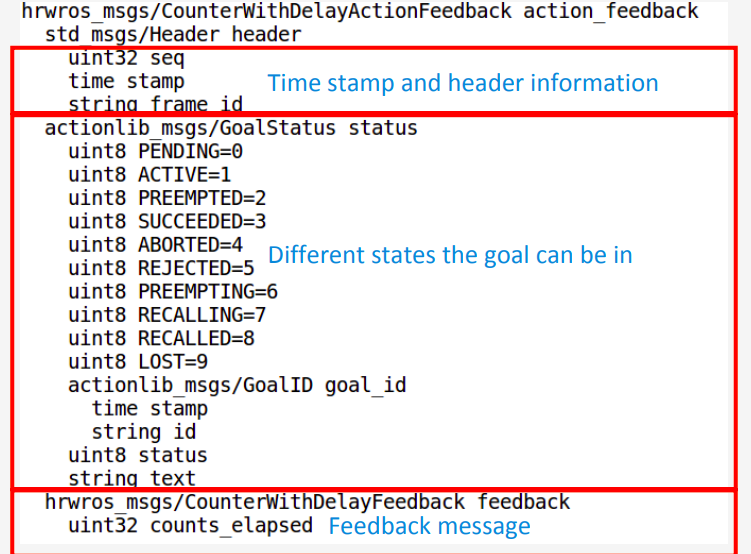

* **`Action server`** topics

 * **`Feedback`** topic is published by the **`action server`** an has action **`feedback`** message type

 * **`Action server`** subscribers to the cancel topic and is of the **`GoalID`** type

## **5. Action	server	goal	callback**

**`hrwros_week1/scripts/counter_with_delay_as.py`**

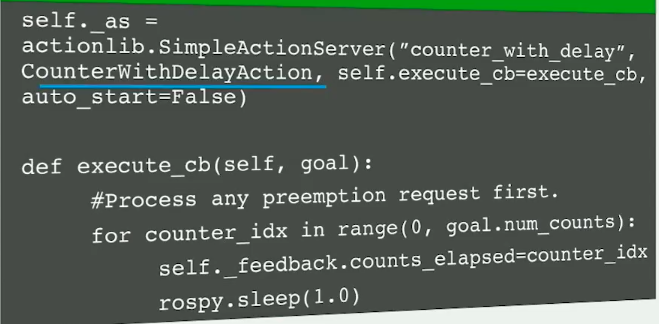

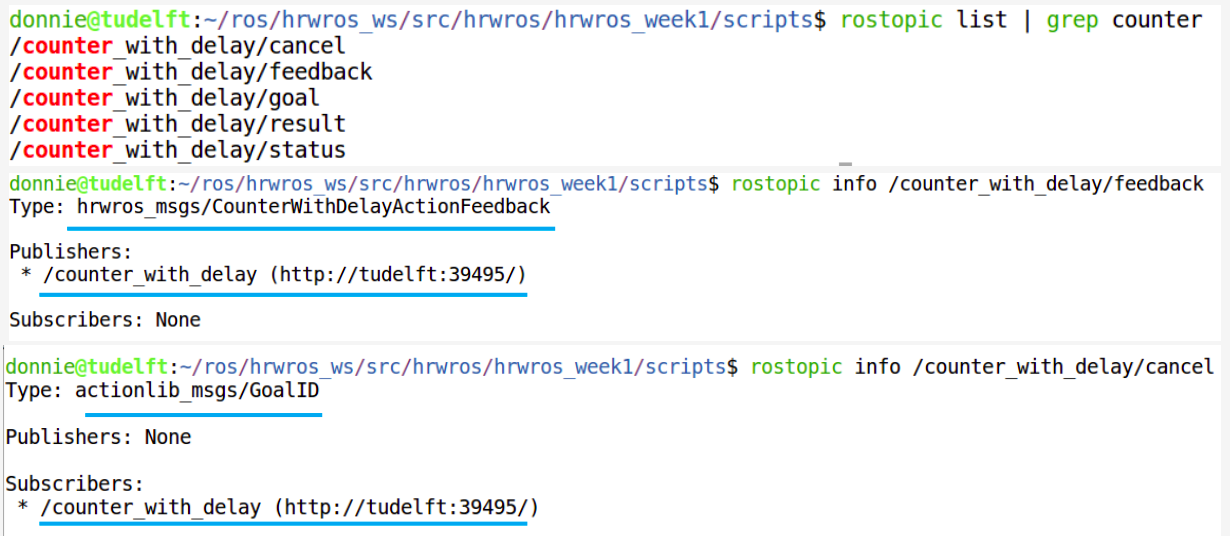

## **6. ROS	Actions	-	Remember!!**

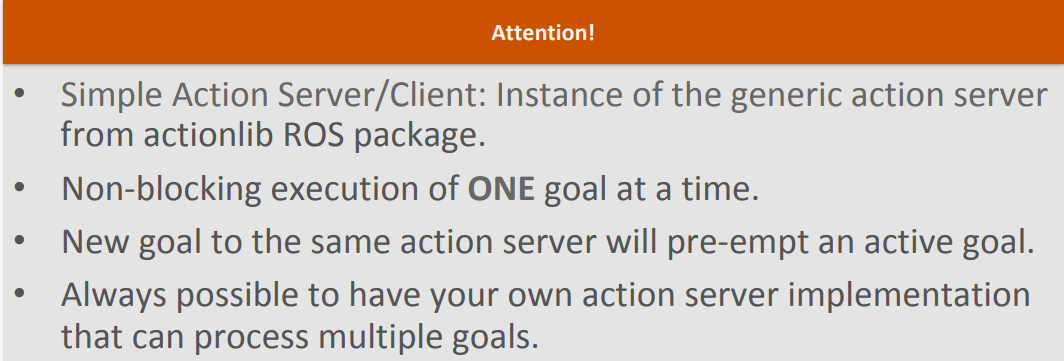

# **4.2.  ROS Actions code illustration: Part 1**

## **1. Creating an action file**

* Let's first create our action folder and our new action file.

In [ ]:
$ mkdir action
$ cd action
$ nano CounterWithDelay.action

In [ ]:
uint32 num_counts		# Goal message: number of counts to count up to.
---
string result_message		# Result message: simple string message for the result.
---
uint32 counts_elapsed		# Feedback message: number of counts elapsed.


`To Do `:

 * `CMakeLists.txt `


In [ ]:
find_package(catkin REQUIRED COMPONENTS    actionlib actionlib_msgs)


In [ ]:
## Generate messages in the 'action' folder
add_action_files(DIRECTORY action
  FILES
  CounterWithDelay.action
)

In [ ]:
catkin_package(
  CATKIN_DEPENDS  actionlib_msgs
)

## **2. Action message**


In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash


 * you will see the complete message definition. 

In [ ]:
$ rosmsg show hrwros_msgs/CounterWithDelayAction

* If you want to see the message definition, you can go to the hrwros_msgs package folder.


In [ ]:
$ roscd hrwros_msgs

* And  run the following script. 


In [ ]:
$ rosrun actionlib_msgs genaction.py -o msg action/CounterWithDelay.action

* There we find all the action definitions. 


In [ ]:
$ rosmsg show hrwros_msgs/

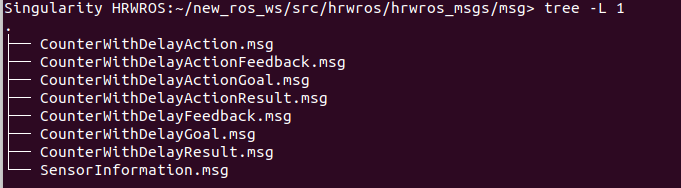

# **4.3 ROS Actions code illustration: Part 2**


 1. **`counter_with_delay_as.py`**


In [ ]:
#! /usr/bin/env python3

# This code has been adapted from the ROS Wiki actionlib tutorials to the context
# of this course.
# (http://wiki.ros.org/hrwros_msgs/Tutorials)

import rospy

import actionlib

from hrwros_msgs.msg import CounterWithDelayAction, CounterWithDelayFeedback, CounterWithDelayResult


class CounterWithDelayActionClass(object):
    # 1. Create messages that are used to publish feedback/result
    _feedback = CounterWithDelayFeedback()
    _result = CounterWithDelayResult()

    def __init__(self, name):
        # 1. This will be the name of the action server which clients can use to connect to.
        self._action_name = name

        # 2. Create a simple action server of the newly defined action type and
        # specify the execute callback where the goal will be processed.
        self._as = actionlib.SimpleActionServer(self._action_name, CounterWithDelayAction, execute_cb=self.execute_cb, auto_start = False)

        # 3. Start the action server.
        self._as.start()
        rospy.loginfo("Action server started...")

    def execute_cb(self, goal):

        counter_delay_value = 1.0

        # 1. Variable for delay
        # Keep in mind a rate is in units 1/sec or Hz
        # We convert the counter_delay_value from seconds to Hz

        delay_rate = rospy.Rate(1/counter_delay_value)

        # 2. Variable to decide the final state of the action server.
        success = True

        # 3. publish info to the console for the user
        rospy.loginfo('%s action server is counting up to  %i with %fs delay between each count' % (self._action_name, goal.num_counts, counter_delay_value))

        # Start executing the action
        for counter_idx in range(0, goal.num_counts):
            # Check that preempt has not been requested by the client
            # Week 4 discuss 
            if self._as.is_preempt_requested():
                rospy.loginfo('%s: Preempted' % self._action_name)
                self._as.set_preempted()
                success = False
                break
            # Publish the feedback
            self._feedback.counts_elapsed = counter_idx
            self._as.publish_feedback(self._feedback)
            # Wait for counter_delay seconds before incrementing the counter.
            # If the rate is 5Hz, this will sleep for 1/5=0.2 seconds.
            delay_rate.sleep()

        if success:
            self._result.result_message = "Successfully completed counting."
            rospy.loginfo('%s: Succeeded' % self._action_name)
            self._as.set_succeeded(self._result)


if __name__ == '__main__':
    # 1. Initialize a ROS node for this action server.
    rospy.init_node('counter_with_delay')

    # 2. Create an instance of the action server here.
    server = CounterWithDelayActionClass(rospy.get_name())
    rospy.spin()


In [ ]:
counter_with_delay_ac.py

2. **`counter_with_delay_ac.py`**

In [ ]:
#! /usr/bin/env python3
# Software License Agreement (BSD License)
#
# Copyright (c) 2018, Delft University of Technology
# TU Delft Robotics Institute. All rights reserved.
#
# Authors: the HRWROS mooc instructors

from __future__ import print_function
import rospy
import sys
# Brings in the SimpleActionClient
import actionlib
# Brings in the messages used by the CounterWithDelay action, including the
# goal message and the result message.
from hrwros_msgs.msg import CounterWithDelayAction, CounterWithDelayGoal


def counter_with_delay_client():
    # 1. Creates the SimpleActionClient, passing the type of the action
    # (CounterWithDelayAction) to the constructor.
    client = actionlib.SimpleActionClient('counter_with_delay', CounterWithDelayAction)

    # 2. Waits until the action server has started up and started
    # listening for goals.
    rospy.loginfo("Waiting for action server to come up...")
    client.wait_for_server()

    num_counts = 3

    # 3. Creates a goal to send to the action server.
    goal = CounterWithDelayGoal(num_counts)

    # 4. Sends the goal to the action server.
    client.send_goal(goal)

    rospy.loginfo("Goal has been sent to the action server.")

    # 5. Waits for the server to finish performing the action.
    # client.wait_for_result()

    # 5.1 Does something else while the action is being done:
    for count_idx in range(0, num_counts):
        rospy.loginfo('I am doing other things while the goal is being serviced by the server')
        rospy.sleep(1.2)

    # 6. Prints out the result of executing the action
    return client.get_result()  # A CounterWithDelayResult


if __name__ == '__main__':
    try:
        # 1. Initializes a rospy node so that the SimpleActionClient can
        # publish and subscribe over ROS.
        rospy.init_node('counter_with_delay_ac')
        result = counter_with_delay_client()
        
        rospy.loginfo(result.result_message)
    except rospy.ROSInterruptException:
        print("program interrupted before completion", file=sys.stderr)


## **1. Actions in action!**


* Don't forget to source your workspace in every shell first!




In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash

* First start roscore in a different terminal. 

* Then we start the **`action server`** and **`client`** with the following commands.




In [ ]:
$ rosrun hrwros_week1 counter_with_delay_as.py



```
[/counter_with_delay] [INFO] [1648414861.603399]: Action server started...
[/counter_with_delay] [INFO] [1648414900.269907]: /counter_with_delay action server is counting up to  3 with 1.000000s delay between each count
[/counter_with_delay] [INFO] [1648414903.271486]: /counter_with_delay: Succeeded

```



In [ ]:
$ rosrun hrwros_week1 counter_with_delay_ac.py



```
[/counter_with_delay_ac] [INFO] [1648414900.243950]: Waiting for action server to come up...
[/counter_with_delay_ac] [INFO] [1648414900.269123]: Goal has been sent to the action server.
[/counter_with_delay_ac] [INFO] [1648414900.271233]: I am doing other things while the goal is being serviced by the server
[/counter_with_delay_ac] [INFO] [1648414901.476140]: I am doing other things while the goal is being serviced by the server
[/counter_with_delay_ac] [INFO] [1648414902.681406]: I am doing other things while the goal is being serviced by the server
[/counter_with_delay_ac] [INFO] [1648414903.885754]: Successfully completed counting.

```



* You can see while the goal is being progressed you can do other things. We can verify this with the following code. 


In [ ]:
$ rostopic echo /counter_with_delay/feedback

# **5. ROS Launch Files**

## **1. Running multiple ROS nodes roslaunch**

*  Group multiple ROS nodes in one file

In [ ]:
• $ roslaunch <package_name> <launch_file.launch>

* Starts up all nodes in the launch file
  *  **`arguments, node specific parameters`**, namespaces. 

* Also possible to include launch files from other packages in the
same launchfile.

## **2. Example launch file**

* 1. **`hrwros_week1/launch/hrwros_week1_servers.launch`** file

In [ ]:
<?xml version="1.0"?>
<launch>
    <!--Argument to the launch file-->
    <arg name="counter_delay_parameter" default="1.0"/>

    <!--Start the metres_to_feet service server ROS node-->
    <node name-"metres_to_feet" pkg="hrwros_week1" type-"metres_to_feet_server.py" output="screen"/>

    <!--Start the action server ROS node-->
    <node name="counter_with_delay" pkg-"hrwros_week1" type="counter_with_delay_as.py" output="screen">
        <param name="counter_delay" type="double" value="$(arg counter_delay_parameter)"/>
    </node>
</launch>
    

* 2. **`hrwros_week1/launch/hrwros_week1_client.launch`** file

In [ ]:
?xml version="1.0"?>
<launch>
  <!-- Argument to the launch file.-->

  <!-- Start the metres_to_feet service client node.-->
  <node name="metres_to_feet" pkg="hrwros_week1" type="metres_to_feet_client.py"
    output="screen"/>

  <!-- Start the counter with delay action server node /-->
  <node name="counter_with_delay_ac" pkg="hrwros_week1" type="counter_with_delay_ac.py"
    output="screen">

  </node>

</launch>
